<a href="https://colab.research.google.com/github/fbarioli/nuovo-repository/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this assignment we use text files in three different languages (English, German, and Italian) to build a training/testing dataset.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving english.txt to english.txt
Saving german.txt to german.txt
Saving italian.txt to italian.txt


We now create a dataset (data) by selecting only the 5-letter words from the three languages and storing the relative ASCII codes. We use Latin1 encoding for German and Italian. We also create the list dataTarget with the corresponding target data (0=English, 1=German, 2=Italian).

In [13]:
# open txt files with words in three different languages

englishFile = open("english.txt","r",encoding='latin1')
germanFile = open("german.txt", "r", encoding='latin1')
italianFile = open("italian.txt", "r", encoding='latin1')

data = []                   # data to be populated with ASCII codes of 5-letter words from the three languages
dataTarget = []             # dataTarget to be populated with a language identifier (0,1,2)

def sift5(x,h):             # sift5 reads lines from a file and stores ASCII codes of 5-letter words only
  for line in x:
    line = line.replace("\n","")
    if (len(line)==5):
      data.append([ord(char) for char in line])
      dataTarget.append(h)

sift5(englishFile,0)        # sift 5-letter words from the three languages and store the language identifier in target
sift5(germanFile,1)
sift5(italianFile,2)

wordCount = len(dataTarget)

print(f"Dataset created. {wordCount} words.")

Dataset created. 18422 words.


We now make a 90/10 training/testing dataset split. Since words are listed alphabetically, a systematic sample provides a simple and unbiased way to split the data.

In [15]:
# 90/10 training/testing split by using a systematic random sample.

training = []
trainingTarget = []
testing = []
testingTarget = []

for i in range(wordCount):
  if (i % 10 == 0):
    testing.append(data[i])    # copy every 10th item to the testing array
    testingTarget.append(dataTarget[i])
  else:
    training.append(data[i])   # copy all the other items to the training array
    trainingTarget.append(dataTarget[i])

print(f"Dataset split completed.")
print(f"Training dataset: {len(trainingTarget)} words.")
print(f"Testing dataset: {len(testingTarget)} words.")

Dataset split completed.
Training dataset: 16579 words.
Testing dataset: 1843 words.


We import, instantiate, and train the KNN, SVM, and MPL models.

In [19]:
from sklearn.neighbors import KNeighborsClassifier  # import models
from sklearn import svm
from sklearn.neural_network import MLPClassifier

knn_model = KNeighborsClassifier()                  # instantiate models
svm_model = svm.SVC()
mlp_nn = MLPClassifier()

knn_model.fit(training, trainingTarget)             # train models
print("KNN training completed.")
svm_model.fit(training, trainingTarget)
print("SVM training completed.")
mlp_nn.fit(training, trainingTarget)
print("MLP training completed.")

KNN training completed.
SVM training completed.
MLP training completed.


We now test the model with the testing dataset. For each model we determine the relative accuracy. A bar-chart provides a visual comparison of the accuracy of the three models.



KNN model accuracy 75.2%
SVM model accuracy 73.5%
MLP model accuracy 73.2%


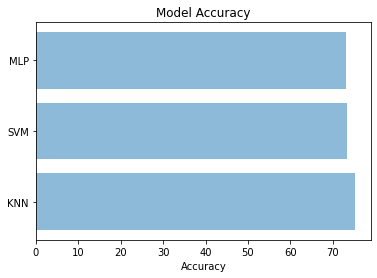

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Target array and predicted arrays
testingTargetArray = np.array(testingTarget)
knnPredict = knn_model.predict(testing)
svmPredict = svm_model.predict(testing)
mlpPredict = mlp_nn.predict(testing)

# Accuracy of each predicted array
def accuracy(predictedArray):
  compare = (predictedArray - testingTargetArray == 0)
  successCount = compare.sum()
  totalCount = len(predictedArray)
  accuracy = 100*successCount/totalCount
  return accuracy

knnAccuracy = accuracy(knnPredict)
print(f"KNN model accuracy {knnAccuracy:.1f}%")
svmAccuracy = accuracy(svmPredict)
print(f"SVM model accuracy {svmAccuracy:.1f}%")
mlpAccuracy = accuracy(mlpPredict)
print(f"MLP model accuracy {mlpAccuracy:.1f}%")

# Label text for each graph
labels = ("KNN", "SVM", "MLP")

# Numbers that you want the bars to represent
value = [knnAccuracy, svmAccuracy, mlpAccuracy]

# Title of the plot
plt.title("Model Accuracy")

# Label for the x values of the bar graph
plt.xlabel("Accuracy")

# Drawing the bar graph
y_pos = np.arange(len(labels))
plt.barh(y_pos, value, align="center", alpha=0.5)
plt.yticks(y_pos, labels)

# Display the graph
plt.show()